## Goal
#### The goal here is to explore a dataset of RNA-Seq data in 92 yeast strains.

In [1]:
# import the basic modules that are needed in this analysis
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# file of the transcriptome in 92 yeast strains
file = 'yeast-transcriptomics/SC_expression.csv'

In [3]:
# load the data into a pandas dataframe and set the gene names as index
# show the head of the dataframe to quickly check if there are problems with the dataset
# because of the data soru
rna = pd.read_csv(file, index_col = 0)
rna.head()

,IFFABF,SAASCC,IFFAFF,IFFAFA,INICIA,INICIF,SAABQI,FFNAAA,IFAAAR,AFIINC,...,SAABIQ,AFNAQI,SAANNN,IFFABB,FFNARS,SAABQF,IFFAFS,IFAAAA.1,IFFAFI,SARIAI
YAL008W,70.804931,30.970186,118.384653,110.703950,74.102235,89.802220,7.341536,112.091167,5.973668,1.599944,...,12.953973,1.638143,34.066051,81.346495,127.981129,14.649997,101.586667,6.574096,110.284505,1.489269
YBR255W,36.368786,16.860290,27.726452,34.527928,35.440199,56.971301,15.452185,26.858749,5.384088,3.205522,...,21.543401,3.547613,28.997105,35.137835,31.181031,13.574768,30.903387,6.459673,29.086023,5.119361
YGR164W,0.351389,0.904239,0.456027,0.292610,0.000000,1.103560,0.769113,18.085545,0.711946,0.614063,...,1.222073,0.712236,0.904559,0.000000,2.586445,1.209633,0.082190,0.977793,0.100993,0.046540
YGR131W,7.379174,5.858715,12.130323,12.679748,11.276427,18.484635,2.377259,22.251591,4.405163,0.467589,...,2.199731,0.491782,11.025385,7.059656,21.936885,2.016055,9.369644,4.691325,12.018183,0.930793
YNL003C,82.049386,78.480411,67.218405,64.179030,75.713153,75.317991,20.136785,43.326887,30.324430,3.650576,...,21.124404,4.232717,131.212325,84.715876,41.766297,17.539675,66.162837,26.712465,75.239886,3.909330


In [4]:
# use .describe to check the basic statistics
# count == 6071 across all strains, pretty good
# notice the std is huge, consistent with the idea that rna expression varies a lot btw different genes
rna.describe()

,IFFABF,SAASCC,IFFAFF,IFFAFA,INICIA,INICIF,SAABQI,FFNAAA,IFAAAR,AFIINC,...,SAABIQ,AFNAQI,SAANNN,IFFABB,FFNARS,SAABQF,IFFAFS,IFAAAA.1,IFFAFI,SARIAI
count,6071.000000,6071.000000,6071.000000,6071.000000,6071.000000,6071.000000,6071.000000,6071.000000,6071.000000,6071.000000,...,6071.000000,6071.000000,6071.000000,6071.000000,6071.000000,6071.000000,6071.000000,6071.000000,6071.000000,6071.000000
mean,164.717509,164.717509,164.717509,164.717509,164.717509,164.717509,164.717509,164.717509,164.717509,164.717509,...,164.717509,164.717509,164.717509,164.717509,164.717509,164.717509,164.717509,164.717509,164.717509,164.717509
std,1996.138327,4504.403873,2047.310542,2039.353280,2674.307321,2420.739660,9553.002753,6568.802723,7009.791246,11539.469792,...,9719.453491,11436.266051,4606.857521,1987.928833,5997.051101,9346.115060,2042.517114,7146.911297,2025.348156,12323.603675
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.124330,11.557305,22.892564,24.676740,14.498263,22.622986,8.250488,7.498884,4.510842,1.304180,...,9.357587,1.414297,14.942298,26.473711,7.950923,7.493003,22.766591,5.086603,23.935373,1.489269
50%,49.458035,31.083216,43.596197,47.207676,37.051118,50.625829,18.039203,15.242830,11.947336,3.624286,...,19.273837,3.968172,38.708318,51.182508,16.237127,16.397244,44.218145,13.314624,46.052870,3.257775
75%,100.058085,74.910551,90.566996,94.805498,83.767744,105.390009,33.666187,32.250104,30.318868,8.862601,...,33.624465,9.649101,86.854776,101.001220,35.156493,30.845636,92.093738,33.120128,94.327589,5.631297
max,139045.950116,345076.446815,136604.215570,134860.137507,173418.561643,142721.661123,743367.446538,449728.925133,535988.079629,898924.605519,...,756328.077151,890823.002549,353911.298933,136038.294143,382765.501690,726519.364306,138986.834089,546392.504957,136731.779298,960156.060460


### Clean up the dataset
Although the dataset is relatively clean (there is no nan in this dataset), there are reads that cannot be mapped/     aligned/ low quality which we are avoiding. This section, I will clean up the dataset for furthur analysis.     

1. The first step of spotting abnormal data/pattern is basic observation.
2. One common tool is heatmap.

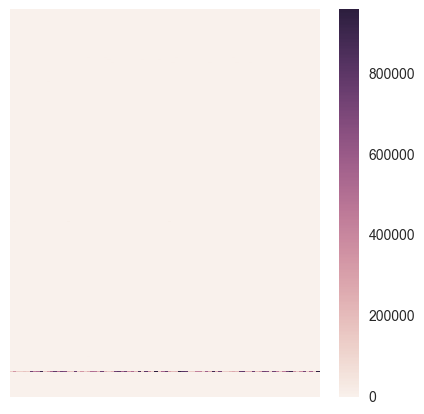

In [5]:
# The first step is to roughly visualize the data via heatmap to see if there are anormalies
# notice that there is one line (gene) of high expression level here
# indicating that this gene is hyperexpressed in yeast or there is something wrong here
fig = plt.figure(figsize=(5, 5))
sns.heatmap(data=rna, xticklabels=False, yticklabels=False)

I used grep to get the list of none-gene rows, **'__ambiguous', '__too_low_aQual', '__not_aligned', '__no_feature', '__alignment_not_unique'**.    
The next step is to get rid of them.

In [6]:
# delete the wrong rows and visulize again
rna.drop(['__ambiguous', '__too_low_aQual', '__not_aligned', '__no_feature', '__alignment_not_unique'], inplace=True)

In [7]:
rna.describe()

,IFFABF,SAASCC,IFFAFF,IFFAFA,INICIA,INICIF,SAABQI,FFNAAA,IFAAAR,AFIINC,...,SAABIQ,AFNAQI,SAANNN,IFFABB,FFNARS,SAABQF,IFFAFS,IFAAAA.1,IFFAFI,SARIAI
count,6066.000000,6066.000000,6066.000000,6066.000000,6066.000000,6066.000000,6066.000000,6066.000000,6066.000000,6066.000000,...,6066.000000,6066.000000,6066.000000,6066.000000,6066.000000,6066.000000,6066.000000,6066.000000,6066.000000,6066.000000
mean,127.909143,96.052582,126.057517,125.891847,114.337745,118.269678,34.845469,48.716715,58.688799,13.180078,...,32.695785,14.032226,95.263101,127.564306,55.565858,35.476779,126.659289,56.148011,126.592382,4.692709
std,335.115270,394.388974,431.008894,390.170589,453.910617,322.107867,85.129380,202.023150,512.471792,71.443089,...,71.574571,69.708976,335.271579,326.893380,222.929537,104.512808,433.033512,395.649256,398.706483,23.039980
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.124330,11.576143,22.892564,24.676740,14.498263,22.622986,8.250488,7.498884,4.516405,1.305588,...,9.357587,1.415145,14.955099,26.473711,7.950923,7.526604,22.787139,5.086603,23.935373,1.489269
50%,49.414111,31.073797,43.596197,47.207676,37.051118,50.625829,18.004243,15.242830,11.947336,3.624286,...,19.256378,3.966476,38.699785,51.182508,16.237127,16.397244,44.177050,13.314624,46.052870,3.257775
75%,99.970237,74.844617,90.293380,94.683577,83.767744,105.390009,33.613747,32.250104,30.288277,8.848047,...,33.615736,9.642318,86.760907,100.880885,35.036750,30.845636,91.970453,33.023909,94.327589,5.631297
max,10663.082028,12672.099762,19505.558926,16596.424116,19580.710222,10980.425047,1923.342617,7875.544006,31230.514662,3624.690061,...,2020.889696,3218.275459,11067.285110,9726.441526,8111.426732,3068.905589,19746.935777,22129.207550,17747.725811,1653.739737


### Heatmap and Clustermap of the dataset

1. Visualization is the fastest way to discover pattern and to lead to interesting questions.    
2. Heatmap here shows the expression level of different RNAs across strains.
3. Cluster map here demonstrates similiarity of transcriptome between strains.

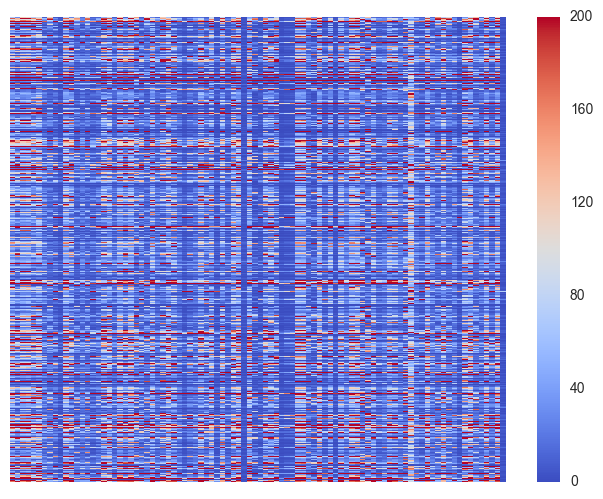

In [8]:
# Heatmap here shows the expression level of different RNAs across strains.
fig = plt.figure(figsize=(8, 6))
sns.heatmap(data=rna, xticklabels=False, yticklabels=False, vmax=200, cmap='coolwarm')
# Not so much here, needs to cluster genes with similar functions together later

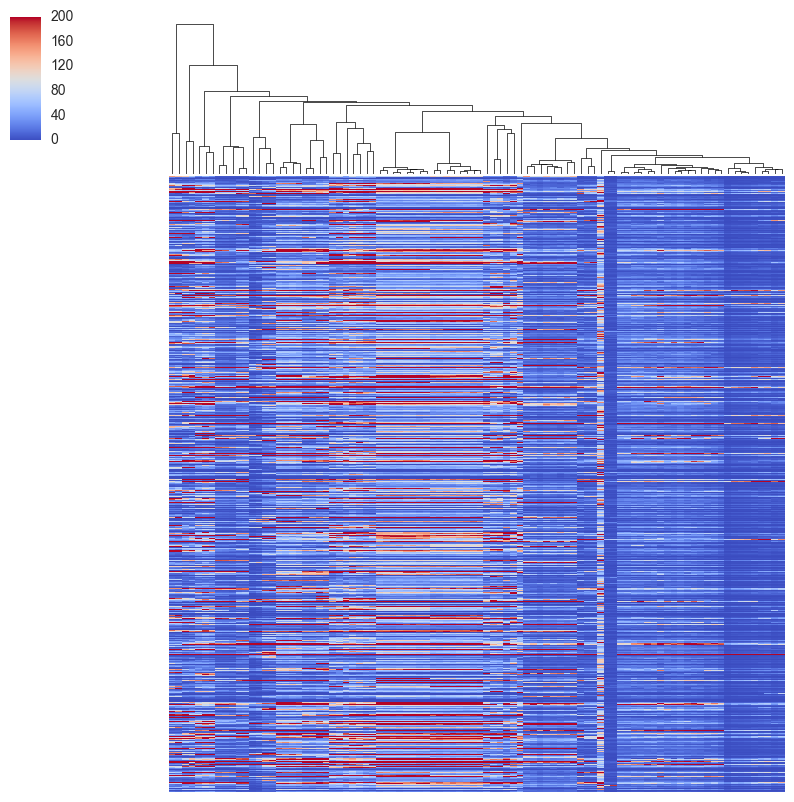

In [9]:
# Clustermap to show the similarity between strains in terms of transcriptome
sns.clustermap(data=rna, xticklabels=False, yticklabels=False, vmax=200, cmap='coolwarm',row_cluster=False)
# Notice the difference of transcriptome of different strains varis so much
# I do not have detailed info about the RNA-Seq exp. and the alignment/ex diff analysis process.
# Thus, the difference here could be from the RNA-Seq exp and the analysis pipeline.

### Exploring different functional gene clusters

Luckily, I got 3 lists of yeast genes which describes each gene's 'biological process' function, cellular position and 'molecular process' fucntion. (Terrible infomation, not so much details)

1. First of all, I need to parse those information and pass them into the dataframe that I had.

In [10]:
# def a function that parse the function of each gene
import csv
def parse_gene_labels(file):
    result = dict()
    reader = csv.reader(open(file, 'r'))
    for row in reader:
        # the functions are in cells >= col 2
        try:
            result[row[0]] = ' '.join(row[2:])
        # for those genes that have no information, leave it as blank
        except Exception as e:
            pass
    return result

In [11]:
# we have 3 lists, biology process (BP), cellular (CC), molecular function(MF)
labels_BP = parse_gene_labels('yeast-transcriptomics/labels_BP.csv')
labels_CC = parse_gene_labels('yeast-transcriptomics/labels_CC.csv')
labels_MF = parse_gene_labels('yeast-transcriptomics/labels_MF.csv')

In [12]:
def label_BP(gene):
    return labels_BP[gene]

def label_CC(gene):
    return labels_CC[gene]

def label_MF(gene):
    return labels_MF[gene]

In [13]:
# integrate all these information into the original dataset
rna['gene'] = rna.index
rna['BP'] = rna['gene'].apply(label_BP)
rna['CC'] = rna['gene'].apply(label_CC)
rna['MF'] = rna['gene'].apply(label_MF)

In [14]:
# to demonstrate that the gene function info are correctly integrated into the dataframe
rna.ix[:, -4:].head()

,gene,BP,CC,MF
YAL008W,YAL008W,ion,membrane mitochond,molecular_function
YBR255W,YBR255W,biological_process,,molecular_function
YGR164W,YGR164W,biological_process,cellular_component,molecular_function
YGR131W,YGR131W,protein ion,membrane,molecular_function
YNL003C,YNL003C,transport ion,mitochond membrane,transmembrane transporter


In [23]:
# check the top 20 functional gene clusters
# notice that 2059 genes were labeled as 'molecular_function' without any detailed information.
# the group that I am interested in is 'transcription'
rna['MF'].value_counts()[:40]

                                                2426
molecular_function                              2059
kinase                                           233
ATP                                              214
transmembrane transporter                        177
transcription RNA polymerase                     112
tRNA                                              88
peptidase                                         71
RNA polymerase transcription                      71
transporter                                       69
histone                                           68
dehydrogenase                                     64
transcription                                     61
RNA polymerase                                    41
hydrolase                                         34
receptor                                          30
ADP                                               27
rRNA binding                                      18
NAD+ dehydrogenase                            

In [16]:
rna_bp = rna.groupby('MF').agg('sum')

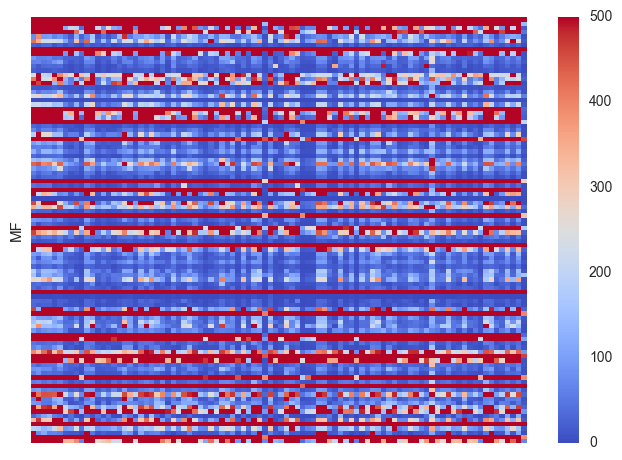

In [17]:
sns.heatmap(data=rna_bp, vmax=500, xticklabels=False, yticklabels=False, cmap = 'coolwarm')

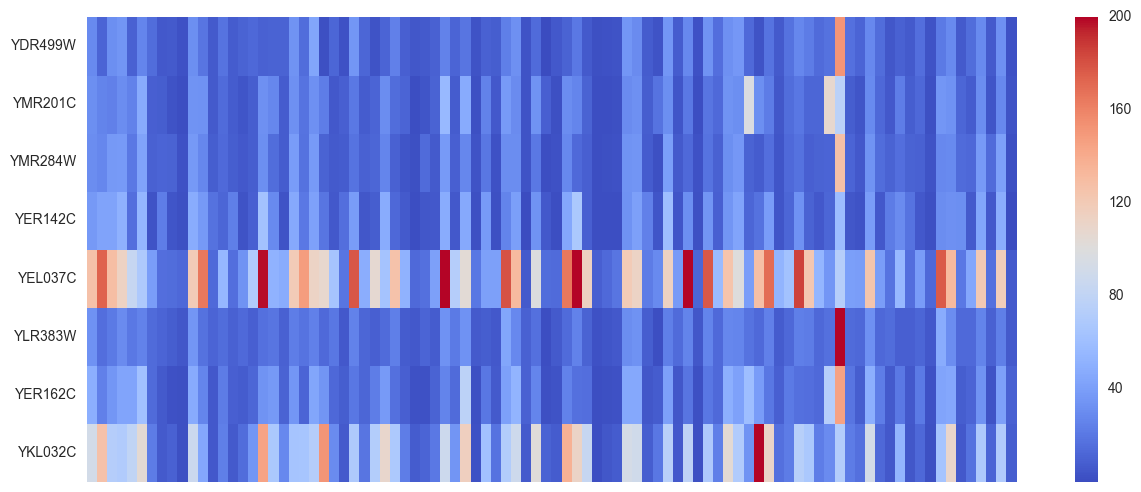

In [28]:
damage = rna[rna['MF'] == 'damage']
fig = plt.figure(figsize=(15, 6))
sns.heatmap(data=damage.ix[:, :-4], vmax=200, xticklabels=False, yticklabels=True, cmap='coolwarm')

# The follow-up of DNA damage repair related genes will be in the later part of this notebook
# http://www.genome.jp/dbget-bin/www_bget?sce:YEL037C

### Dimension Reduction
Although we do not have any information about different yeast strains. If we move on to projects focusing on finding the correlation between transcriptome and phenotype, one of the most important approach is to use dimenstion reduction to extract principal variables.

Here, I am using t-sne and PCA to demonstrate this process.
**t-sne is quite handy in the RNA-Seq data analysis in **

In [65]:
# import modules for t-sne or PCA from scikit learn
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# transform the dataset via two method
rna_tsne = TSNE(learning_rate=100, perplexity=30).fit_transform(rna.ix[:, :-6].transpose())
rna_pca = PCA().fit_transform(rna.ix[:, :-6].transpose())
# notice here we are focusing on different strains of yeast, each point in the figure represent one strain
# Notice t-sne works really good in terms of seperation while PCA works pretty terrible

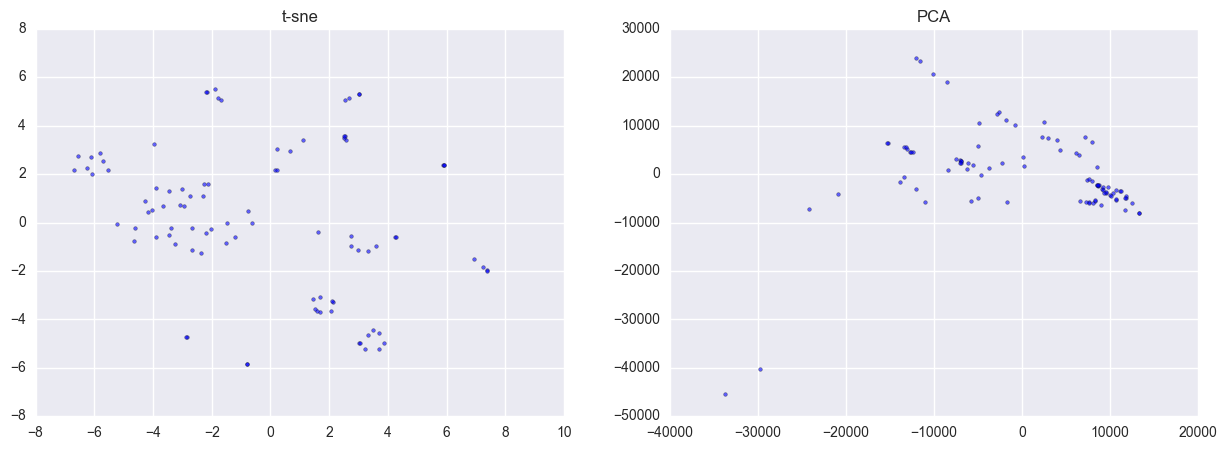

In [66]:
# plot out the result
fig = plt.figure(figsize=(15, 5))
ax1 = plt.subplot(121)
ax1.scatter(rna_tsne[:, 0], rna_tsne[:, 1], alpha=0.6, s=7)
ax1.set_title('t-sne')
ax2 = plt.subplot(122)
ax2.scatter(rna_pca[:, 0], rna_pca[:, 1], alpha = 0.6, s=7)
ax2.set_title('PCA')

In [51]:
# what about focusing on genes?
rna_gene_tsne = TSNE(learning_rate=1000, perplexity=50).fit_transform(rna.ix[:, :-6])
rna_gene_pca = PCA().fit_transform(rna.ix[:, :-6])

In [42]:
rna['MF_cat'] = rna['MF'].astype('category')
rna['MF_number'] = rna['MF_cat'].cat.codes

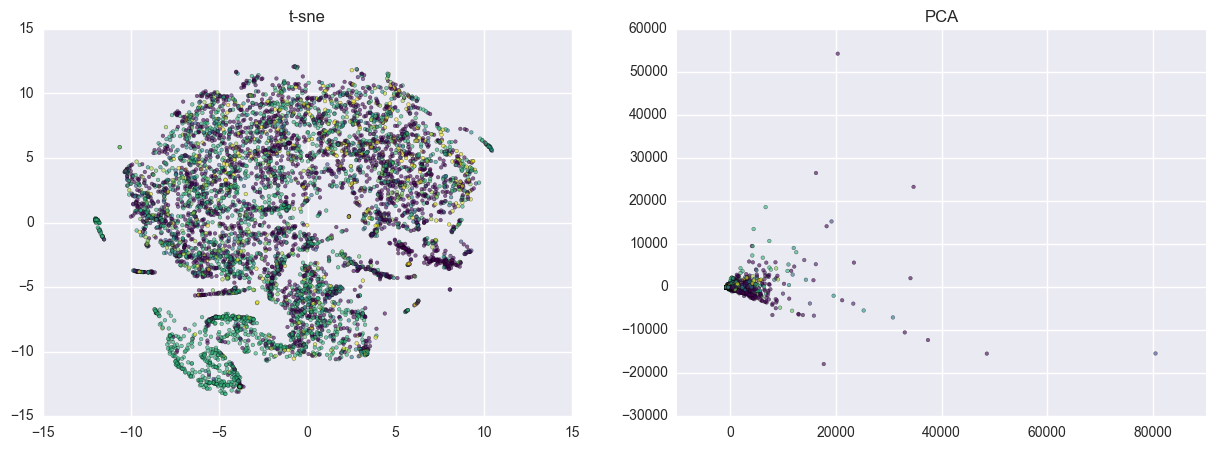

In [53]:
# t-sne is showing so much potential for optimization
# different color here indicates different molecular functions
fig = plt.figure(figsize=(15, 5))
ax1 = plt.subplot(121)
ax1.scatter(rna_gene_tsne[:, 0], rna_gene_tsne[:, 1], alpha=0.6, c = rna['MF_number'], cmap='viridis', s=7)
ax1.set_title('t-sne')
ax2 = plt.subplot(122)
ax2.scatter(rna_gene_pca[:, 0], rna_gene_pca[:, 1], alpha=0.6, c = rna['MF_number'], cmap='viridis', s=7)
ax2.set_title('PCA')

In [ ]:
### DNA damage repair related genes

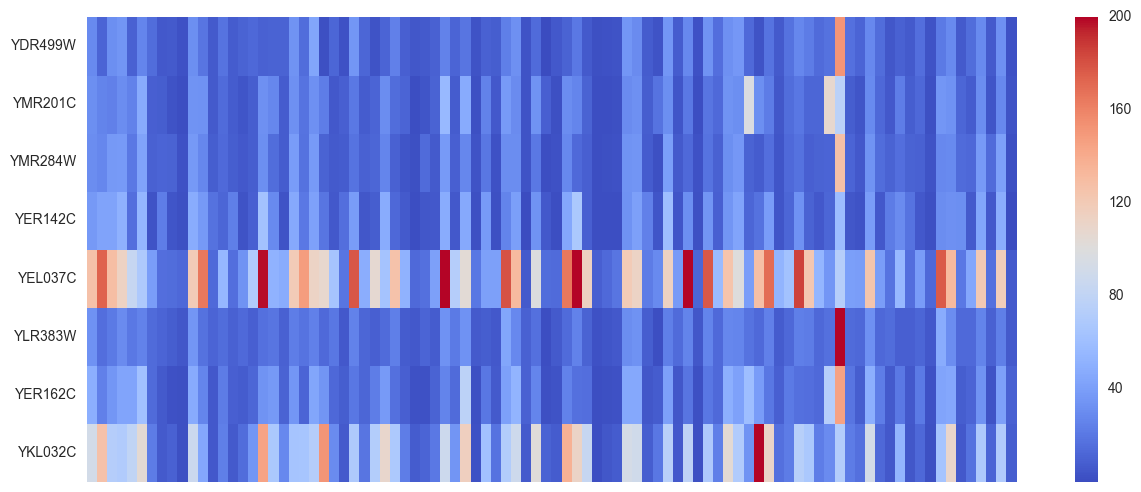

In [87]:
fig = plt.figure(figsize=(15, 6))
damage = damage.ix[:, :92]
sns.heatmap(data=damage, vmax=200, xticklabels=False, yticklabels=True, cmap='coolwarm')

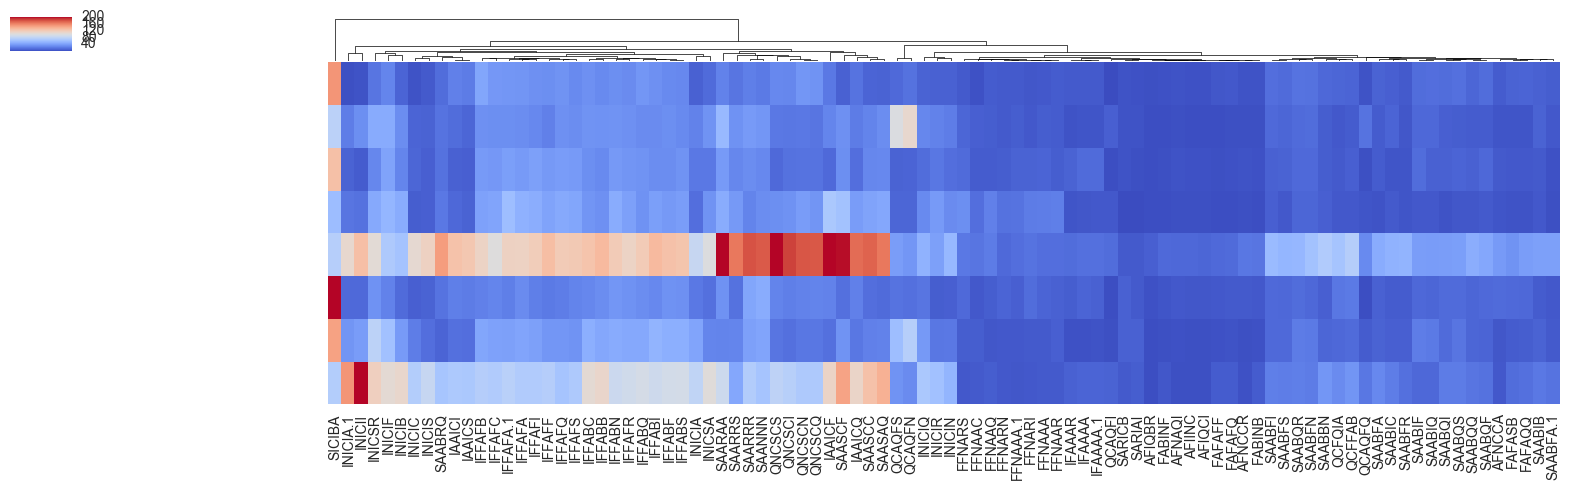

In [102]:
sns.clustermap(data=damage, vmax=200, row_cluster=False, xticklabels=True, yticklabels=False,\
               cmap = 'coolwarm', figsize=(20, 5))

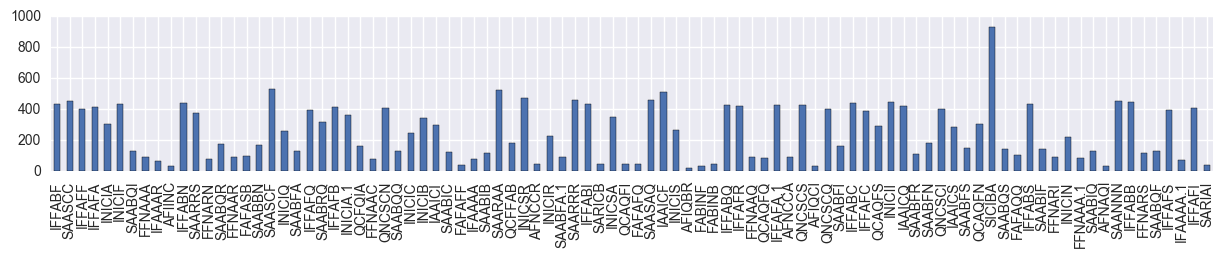

In [105]:
damage_sum = damage.sum()
damage_sum.plot(kind='bar', figsize=(15, 2))

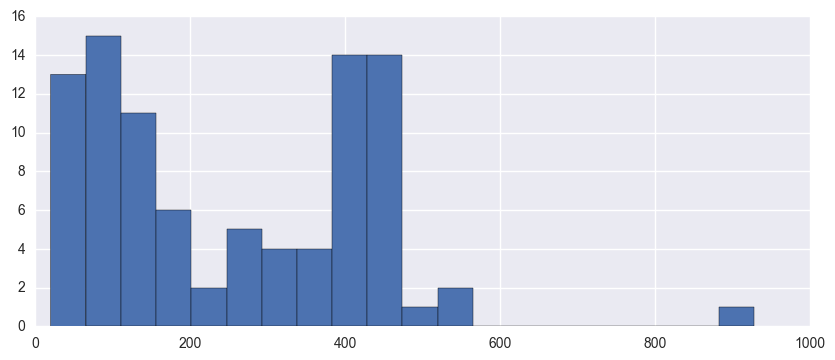

In [113]:
damage_sum.hist(bins=20, figsize=(10, 4))

In [ ]:
# http://www.genome.jp/dbget-bin/www_bget?sce:YEL037C

# http://www.genome.jp/dbget-bin/www_bget?sce:YLR383W

# 

In [116]:
rna.ix['YEL037C'].corr(rna)

nan